# <Center>  **Exploratory Data Analysis**

## Loading Data and Packages

Import Packages

In [2]:
# Import the Data Science Essentials
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython import display
from kmodes.kprototypes import KPrototypes

from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm

plt.style.use('dark_background')

Set Directory to Capstone-2 folder to make everything simple.

In [3]:
# Find and set the working directory for this project
os.chdir(r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Capstone-2')

Load the Data

In [4]:
# Import the data
data = pd.read_csv('./data/interim/KDD Data.csv')
data = data.drop('Unnamed: 0', axis = 1)
num_only_data = pd.read_csv('./data/interim/Num Only Data.csv')
num_only_data = num_only_data.drop('Unnamed: 0', axis = 1)

## Basic Analysis

Many of the names of the features in this dataset are not intuitive, so I will define them all:
- **duration:** length (number of seconds) of the connection 	
    - continuous
- **protocol_type:** type of the protocol, e.g. tcp, udp, etc. 	
    - discrete
- **service:** network service on the destination, e.g., http, telnet, etc. 	
    - discrete
- **src_bytes:** number of data bytes from source to destination 	
    - continuous
- **dst_bytes:** number of data bytes from destination to source 	
    - continuous
- **flag:**	normal or error status of the connection 	 
    - discrete 
- **land:**	1 if connection is from/to the same host/port; 0 otherwise 	
    - discrete
- **wrong_fragment:** number of ``wrong'' fragments 	
    - continuous
- **urgent:** number of urgent packets 	
    - continuous
- **hot:** number of ``hot'' indicators	
    - continuous
- **num_failed_logins:** number of failed login attempts 	
    - continuous
- **logged_in:** 1 if successfully logged in; 0 otherwise 	 
    - discrete
- **num_compromised:** number of ``compromised'' conditions 	
    - continuous
- **root_shell:** 1 if root shell is obtained; 0 otherwise 	
    - discrete
- **su_attempted:** 1 if ``su root'' command attempted; 0 otherwise 	
    - discrete
- **num_root:**	number of ``root'' accesses 	
    - continuous
- **num_file_creations:** number of file creation operations 	
    - continuous
- **num_shells:** number of shell prompts 	
    - continuous
- **num_access_files:** number of operations on access control files 	
    - continuous
- **num_outbound_cmds:** number of outbound commands in an ftp session 	
    - continuous
- **is_hot_login:** 1 if the login belongs to the ``hot'' list; 0 otherwise 	
    - discrete
- **is_guest_login:** 1 if the login is a ``guest''login; 0 otherwise 	
    - discrete
- **count:** 	number of connections to the same host as the current connection in the past two seconds 	continuous
Note: The following  features refer to these same-host connections.	
- **serror_rate:** % of connections that have ``SYN'' errors 	
    - continuous
- **rerror_rate:** % of connections that have ``REJ'' errors 	
    - continuous
- **same_srv_rate:** % of connections to the same service 	
    - continuous
- **diff_srv_rate:** % of connections to different services 	
    - continuous
- **srv_count:** number of connections to the same service as the current connection in the past two seconds 	continuous
Note: The following features refer to these same-service connections.	
- **srv_serror_rate:** % of connections that have ``SYN'' errors 	
    - continuous
- **srv_rerror_rate:** % of connections that have ``REJ'' errors 	
    - continuous
- **srv_diff_host_rate:** % of connections to different hosts 	
    - continuous 
- **dst_host_count:** Same as count but from destination to source
    - continuous.
- **dst_host_srv_count:** Same as srv_count but from destination to source
    - continuous.
- **dst_host_same_srv_rate:** Same as same_srv_rate but from destination to source
    - continuous.
- **dst_host_diff_srv_rate:** Same as diff_srv_rate but from destination to source
    - continuous.
- **dst_host_same_src_port_rate:** Same as same_src_port_rate but from destination to source
    - continuous.
- **dst_host_srv_diff_host_rate:** Same as srv_diff_host_rate but from destination to source
    - continuous.
- **dst_host_serror_rate:** Same as serror_rate but from destination to source
    - continuous.
- **dst_host_srv_serror_rate:** Same as srv_serror_rate but from destination to source
    - continuous.
- **dst_host_rerror_rate:** Same as rerror_rate but from destination to source
    - continuous.
- **dst_host_srv_rerror_rate:** Same as srv_rerror_rate but from destination to source
    - continuous.



The label column gives us the kind of intrusion. These intrusion types are also not obvious to understand without prior knowledge in this area. As such, I consulted a more well read source, ChatGPT. I formatted the the query in the python cell below by creating a python output that was in bullet form, then I inputed it into chatGPT which was able to give really good definitions to labels that were not even clear attack types.

In [5]:
for type in data['labels'].unique():
    print(f"- {type}")

- normal.
- buffer_overflow.
- loadmodule.
- perl.
- neptune.
- smurf.
- guess_passwd.
- pod.
- teardrop.
- portsweep.
- ipsweep.
- land.
- ftp_write.
- back.
- imap.
- satan.
- phf.
- nmap.
- multihop.
- warezmaster.
- warezclient.
- spy.
- rootkit.


After plugging the above list into ChatGPT with the query "For each of these network intrusions can you please give a sentence summary describing what they are." ChatGPT returned these explanations for each of the network intrusion types
- **normal:** This is not an attack type, but rather a classification used to indicate that the network traffic is within normal parameters.
- **buffer_overflow:** This attack occurs when a program or process attempts to store more data in a buffer than it was intended to hold, causing the excess data to overflow into adjacent memory locations.
- **loadmodule:** This type of attack involves the unauthorized loading of a module or plugin into a vulnerable system, which can then be used to gain further access or control over the system.
- **perl:** This is a type of attack that involves exploiting vulnerabilities in Perl scripts, which are often used to power web applications and other online services.
- **neptune:** This attack type involves overwhelming a targeted system with a flood of TCP packets, causing it to become unresponsive or crash.
- **smurf:** This attack type is similar to the neptune attack, but involves using a network of intermediary hosts to amplify the volume of traffic directed at the target system.
- **guess_passwd:** This attack type involves attempting to guess a user's password by systematically trying a large number of possible combinations.
- **pod:** This attack type involves sending malformed packets to a target system in order to cause it to crash or become unstable.
- **teardrop:** This is a type of attack that involves sending overlapping or malformed packets to a target system, causing it to crash or become unstable.
- **portsweep:** This attack involves scanning a range of network ports on a target system to identify potential vulnerabilities or open services.
- **ipsweep:** This attack involves scanning a range of IP addresses to identify potential targets for further attacks or exploitation.
- **land:** This attack type involves sending TCP packets with the source IP address set to the same as the destination IP address, causing the targeted system to become unresponsive or crash.
- **ftp_write:** This attack involves gaining unauthorized access to an FTP server and uploading or modifying files on the server.
- **back:** This type of attack involves installing backdoor software on a targeted system, which can then be used to gain unauthorized access or control over the system at a later time.
- **imap:** This attack involves exploiting vulnerabilities in the Internet Message Access Protocol (IMAP), which is commonly used for retrieving email messages.
- **satan:** This is a type of network scanning tool that can be used to identify potential vulnerabilities or open services on a target system.
- **phf:** This attack involves exploiting vulnerabilities in the Common Gateway Interface (CGI) scripts that are often used to power web applications and other online services.
- **nmap:** This is another type of network scanning tool that can be used to identify potential vulnerabilities or open services on a target system.
- **multihop:** This type of attack involves using a chain of intermediary hosts to mask the origin of the attack and make it more difficult to trace back to the attacker.
- **warezmaster:** This attack type involves using a compromised system to distribute pirated software or other illegal materials.
- **warezclient:** This attack involves using a compromised system to download pirated software or other illegal materials.
- **spy:** This type of attack involves monitoring or eavesdropping on network traffic in order to steal sensitive information or gain unauthorized access to a targeted system.
- **rootkit:** This is a type of malware that is designed to hide its presence on a targeted system, making it more difficult to detect or remove.

At first glance the different types of intrusions clearly fall into separate groups. On the original challenge's [webpage](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) the contest makers list 4 distinct groups:
- DOS: denial-of-service, e.g. syn flood;
- R2L: unauthorized access from a remote machine, e.g. guessing password;
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
- probing: surveillance and other probing, e.g., port scanning.

This makes sense. For example, portsweep and ipsweep are clearly in the probing group as they are types of sweeps that search for vulnerabilities. 

But we can't assume that intrusions of the same kind should be grouped together. It could be that a hacker would use ipsweep as a first step in a ping of death (pod) attack, while rarely ever using an ipsweep and portsweep in the same attack together. Without clear information on how to group the different intrusions, we need to use cluster analysis to provide a more rigorous analysis.

## Creating Clusters

This dataset has both categorical and numerical data types. K-Prototypes is a clustering algorithm that was designed to handle mixed data types. We do not know the number of clusters that are in the data so we will graph K-Prototype's dissimilarity vs the amounnt of clusters (K) to find the optimal number of clusters. 

I also came up with my own grouping that has more specific groups than the competitions list of four. While the competition's grouping made sense, I thought that a method specific approach would be another potentially valid grouping. 

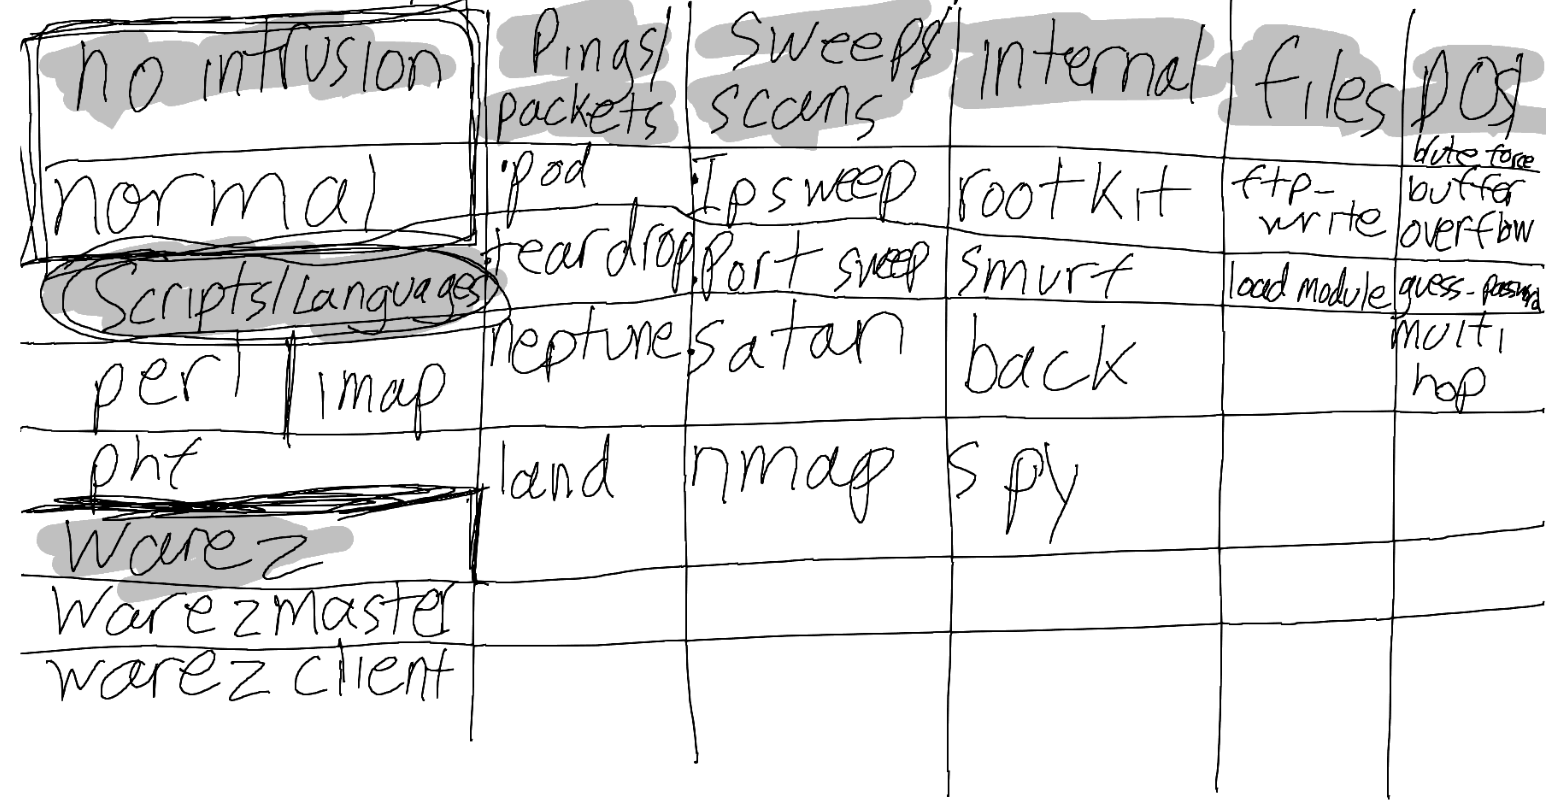

In [ ]:
display.Image('./notebooks/Supernote/Potential Cluster Groupings.png')

My handwriting isn't great, All the highlighted cells are names of my groupings.

The next cell is processing the data so that it only has independent variables and has the categorical columns as type categorical.

In [5]:
#Remove the y from the dataframe so the result is not influence by it
X = data.drop('labels', axis = 1)

# Create list of categorical columns including binary in a list comprehension. 
cat_col = [col for col in X.columns if X[col].dtype == 'object' or set(X[col].unique()) == {0,1}]

# Convert binary columns into categorical columns because they represent two states more so than degrees
X[cat_col] = X[cat_col].astype('category')

After running the previous cell, I had tried to run KPrototypes clustering. This was a complete failure as none of the algorithm's attempts to initialize the centroids were sucessful. This was because of the large differences in magnitude of the numeric and binary variables. I fixed this by using scikit-learn's standard scaler function to drastically reduce largest numeric variables to a useable size.

In [6]:
# Gather all of the columns in X that aren't in the categorical column
num_col = list(set(list(X.columns)) - set(cat_col))

# Create a dataframe that is just the numerical X columns
X_num = X[num_col]

# Use the sklearn's standard scalar and fit it to the data and return the scaled data.
X_num_scaled = pd.DataFrame(StandardScaler().fit_transform(X_num))
X_num_scaled.columns = X_num.columns

# Create X_scaled which is the scaled numerical columns and the categorical columns
X_scaled = pd.concat([X_num_scaled, X[cat_col]], axis= 1)

# Convert the column names into the index number for the columns
cat_col_index = [X_scaled.columns.get_loc(col_name) for col_name in cat_col]

After splitting up the different intrusions into categories represented by the highlighted boxes above, it appeared that there were 8 tentative categories based on a casual sort through the types. While there is nothing definitive about this grouping, it should give us an insight to put 8 clusters firmly within the range of the number of clusters that we should try. 

While the code is no longer here, I ran KPrototype with a range of 10 cluster values. Sadly, my computer wasn't able to finish the loop after 160 minutes. This lead me to try to use my GPU instead of my CPU since GPU's are significantly better at parallel computation than CPUs and the nature of the calculations may be optimized on a GPU. Unfortunately, the code that it would take to run on a GPU is beyond me. 

In the next cell I ran the code with less iterations and installed a progress bar keep track of the amount of K values that had been computed. The formula for KPrototype in this cell is unweighted between categorical and numeric columns.

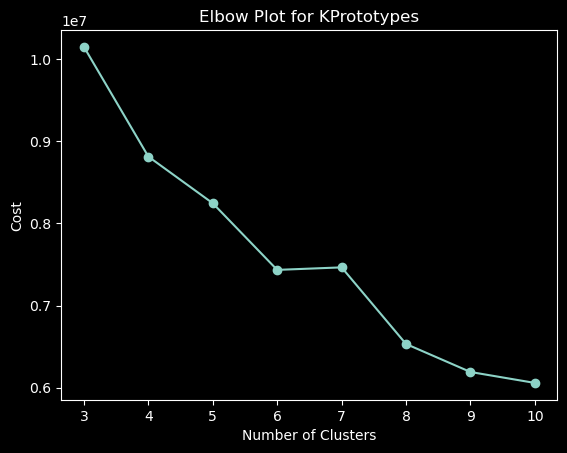

In [14]:
# Initialize cost list
cost = []

# Iterate for different amounts of centroids
for k in tqdm(range(3,11)):
    # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
    KProto = KPrototypes(n_clusters = k, init = 'Cao', n_init = 10, verbose = 0)
    # Use the KPrototypes model on the actual data
    cluster_labels = KProto.fit_predict(X_scaled, categorical = cat_col_index)
    # Append cost to the cost list for graphing later
    cost.append(KProto.cost_) 

# An elbow plot of k vs the cost function to try to find the optimal k
plt.plot(range(3,11), cost, marker = 'o');
plt.xlabel('Number of Clusters');
plt.ylabel('Dissimilarity');
plt.title('Elbow Plot for KPrototypes');

The graph above has a bizarre rise in the dissimilarity score between 6 to 7 clusters. This can happen with categorical features as enough former matches can be undone that it overcomes the decrease in the distances of the numeric points. As a test, I will raise the parameter Gamma to 0.75 to de-emphasize the categorical variables. That will create a cleaner descent in the dissimilarity with respect to K.

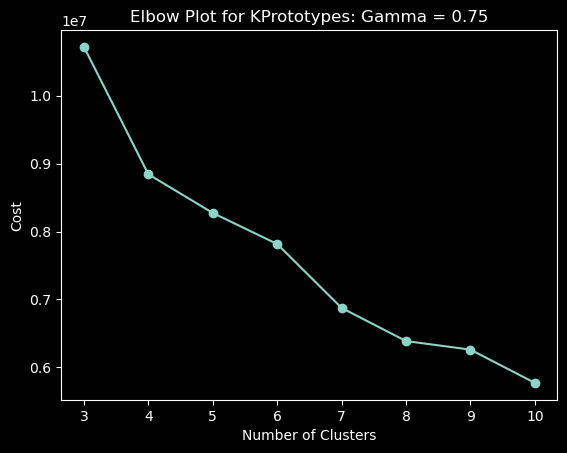

In [25]:
# Initialize cost list
cost_g75 = []

# Iterate for different amounts of centroids
for k in tqdm(range(3,11)):
    # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
    KProto = KPrototypes(n_clusters = k, init = 'Cao', n_init = 10, gamma = .75, verbose = 0)
    # Use the KPrototypes model on the actual data
    cluster_labels = KProto.fit_predict(X_scaled, categorical = cat_col_index)
    # Append cost to the cost list for graphing later
    cost_g75.append(KProto.cost_) 

# An elbow plot of k vs the cost function to try to find the optimal k
plt.plot(range(3,11), cost_g75, marker = 'o');
plt.xlabel('Number of Clusters');
plt.ylabel('Dissimilarity');
plt.title('Elbow Plot for KPrototypes: Gamma = 0.75');

Interestingly the graph seems to have two elbows, one at 4 which is the amount of groups that the competition said there were, and one at 7 which had the weird bump in the previous graph. 

Without a single clear elbow in this graph, we can use a gap statistic to find a more analytical way to determine the value of K. Unfortunately, the only gap statistic packages that I could install use pip instead of conda and the packages themselves became to complicated for me to figure out in this context.

With other methods to calculate the correct number of clusters and the validity of the clusters, I saved the scaled version of the data that I had been working with.

In [9]:
# Save X_scaled
X_scaled.to_csv('./data/interim/X_scaled.csv')

I had assumed that the correct value for the number of clusters was 8 based on the first elbow graph. I reran the calculation in the next cell to get the labels for K=8

In [ ]:
# Use K-Prototype to generate a model. 
KProto = KPrototypes(n_clusters = 8, init = 'Cao', n_init = 10, verbose = 1)
# Use the KPrototypes model on the actual data
cluster_labels = KProto.fit_predict(X_scaled, categorical = cat_col_index)

I then saved those labels as a dataframe so I wouldn't have to run the 50 minute calculations again.

In [15]:
#data['clusters'] = cluster_labels
clusters = list(cluster_labels)
clusters_df = pd.DataFrame({'cluster':clusters})
clusters_df.to_csv('./data/interim/clusters.csv')

    Now that I have generated clusters and labeled each observation, I need a way to validate the existence of a clustered structure in the data. The most straightforward way to evaluate the structure is a silhouette score which measures the distance or dissimilarity from other cluster's centroids (center of the cluster) compared to the dissimilarity to its own centroid. The closer a point is to its own centroid, while being far away from other centroids, the clearer it is that the structure is clustered. Unfortunately, when I ran the computation in R, the dataset was so large that the dissimilarity matrix (store of all the distances) returned a 900+ GB vector. That is far outside the ability of my computer or any normal commercial computer to handle. Even if I were to use just a tenth of the dataset for a representative sample, that would still generate a 9+ GB vector. As such I have to use different algorithms that are not as direct but can still lend some insight into validity of the clustering structure. 

The algorithms that I chose are the: 

#### **<center> Adjusted Rand Index (ARI) </center>**

$$
\mathrm{ARI}(true, new) = \mathrm{ADJ}(\frac{Matching Pairs}{Total Pairs}) 
$$
- Where true is the "true value of the clusters, 
- new is the dataset it is being compared to, 
- A pair is each combination of cluster labels from the true, and new datasets, 
- ADJ is the adjustment, it corrects for the amount of pairs that will match out of pure chance
    
#### **<center> Normalized Mutual Index (NMI) </center>** 

$$
NMI = \frac{2 * I(true, new)}{H(true) + H(new)}
$$
- true: ibid
- new: ibid
- I(true, new) is a function that measure how much the two cluster sets have in common
- H(true) and H(new) are the entropy of the cluster labels. More simply it measures the distribution
    of clusters over the data. The more evenly distributed the clusters, the higher the entropy

#### **<center> Fowlkes-Mallow Index (FMI) </center>**

$$
\text{FMI} = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}
$$
- TP is the number of pairs that have the same cluster label as the first set of labels,
- FP is the number of pairs that have the same cluster label as the second set of labels

The ARI measures the similarity between two sets of labels on a scale of -1 to 1 where negative values indicate clear difference and 1 is a perfect match. NMI and FMI are from 0 to 1 and also measure similarity. To test the structure of this dataset, I can take a representative sample, run the clustering algorithm on the sample and then compare the sample's clusters to the full dataset's labels. If there are no clusters and the data is random, then I will get two very different sets of labels that will have low similarity scores. I don't have a clear threshhold to determine if there are clusters in the data but the closer the scores are to 1, the higher the likelihood that the data has a clustered structure.

I ran the tests for K values 6 to 8 to evaluate what the best value of K is. The higher the scores, the better the value of K must be. I ran each of the algorithms five times on new samples and then averaged results to obtain the similarity scores.

In [7]:
# Initialize Rand Index, Normalized Mutual Index, Fowlkes-Mallow
Rand, NMi, FMi = [], [], []

# The elbow plots indicated that the optimal k-value was between 6-8 This will hopefull give us some understanding
for k in tqdm(range(6,9)):
    # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
    KProto = KPrototypes(n_clusters = k, init = 'Cao', n_init = 10, verbose = 0)
    # Use the KPrototypes model on the actual data
    cluster_labels = KProto.fit_predict(X_scaled, categorical = cat_col_index)
    # Create many representative samples to get rid of any possible bad luck
    for i in range(5):
        # Create Bootstrap dataset with the same index as before so that I can find the original clusters as well
        bootstrap = X_scaled.sample(frac = 0.2, replace = True)
        # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
        KProto = KPrototypes(n_clusters = k, init = 'random', n_init = 10, verbose = 0)
        # Use the KPrototypes model on the actual data
        bootstrap_labels = KProto.fit_predict(bootstrap, categorical = cat_col_index)
        # Create Original Dataset's lables for bootstrapped data
        orig_value = [cluster_labels[i] for i in bootstrap.index]
        # Rand index calculation
        Rand.append(adjusted_rand_score(orig_value, bootstrap_labels))
        # Normalized Mutual index calculation
        NMi.append(normalized_mutual_info_score(orig_value, bootstrap_labels))
        # Fowlkes Mallow Index calculation
        FMi.append(fowlkes_mallows_score(orig_value, bootstrap_labels))

    # Print out the results for each Value of K
    print(f"K = {k}")
    print(f"Adjusted Rand Index: {np.mean(Rand)}     Normalized Mutual Index: {np.mean(NMi)}     Fowlkes Mallow Index: {np.mean(FMi)}")

 33%|███▎      | 1/3 [1:01:37<2:03:14, 3697.08s/it]

K = 6
Adjusted Rand Index: 0.8894501077101736     Normalized Mutual Index: 0.8873246516672953     Fowlkes Mallow Index: 0.9440910791463004


 67%|██████▋   | 2/3 [2:06:58<1:03:48, 3828.89s/it]

K = 7
Adjusted Rand Index: 0.9025865030551978     Normalized Mutual Index: 0.9124404909097266     Fowlkes Mallow Index: 0.9515153329286624


100%|██████████| 3/3 [3:16:56<00:00, 3938.97s/it]  

K = 8
Adjusted Rand Index: 0.8943602650541045     Normalized Mutual Index: 0.894223063479141     Fowlkes Mallow Index: 0.9462829744226278


I wasn't conviced that the similarity scores are valid proofs for the existence of a structure. As such I created a completely random dataset and ran the same test as above to see what would happen if there were no clusters. Since all of the scores were significantly lower than my dataset, this method is solid.

In [3]:
# Test a random dataset's similarity score
# set random seed for reproducibility
np.random.seed(123)

# create categorical columns
cat_col1 = pd.Series(np.random.choice(['A', 'B', 'C'], size=1000))
cat_col2 = pd.Series(np.random.choice(['X', 'Y', 'Z'], size=1000))

# create numerical columns
num_cols = pd.DataFrame(np.random.randn(1000, 8), columns=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'Num7', 'Num8'])

# concatenate categorical and numerical columns
df = pd.concat([cat_col1, cat_col2, num_cols], axis=1)

# set column names for categorical columns
df.columns = ['Cat1', 'Cat2', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'Num7', 'Num8']

# Perform the clustering for the dataset
KProto = KPrototypes(n_clusters = 8, init = 'cao', n_init = 10, verbose = 0)
# Use the KPrototypes model on the actual data
labels = KProto.fit_predict(df, categorical = [0,1])


# Create Bootstrap dataset with the same index as before so that I can find the original clusters as well
bootstrap = df.sample(frac = 0.2, replace = True)

# Re run the clustering for the sample
KProto = KPrototypes(n_clusters = 8, init = 'random', n_init = 10, verbose = 0)
# Use the KPrototypes model on the actual data
bootstrap_labels = KProto.fit_predict(bootstrap, categorical = [0,1])

# Create Original Dataset's lables for bootstrapped data
orig_value = [labels[i] for i in bootstrap.index]

# Rand index calculation
Rand = adjusted_rand_score(orig_value, bootstrap_labels)

# Normalized Mutual index calculation
NMi = normalized_mutual_info_score(orig_value, bootstrap_labels)

# Fowlkes Mallow Index calculation
FMi = fowlkes_mallows_score(orig_value, bootstrap_labels)

print(f"Adjusted Rand Index: {Rand}")
print(f"Normalized Mutual Index: {NMi}")
print(f"Fowlkes Mallow Index: {FMi}")

Adjusted Rand Index: 0.18599893493315675
Normalized Mutual Index: 0.34959850252909774
Fowlkes Mallow Index: 0.289448260165949


Here I also regenerated the K=7 labels to be able to work with them in the future since K=7 appears to be the best amount of clusters. 

In [ ]:
# Generate the clusters for K = 7 
# Use K-Prototype to generate a model. 
KProto = KPrototypes(n_clusters = 7, init = 'Cao', n_init = 10, verbose = 0)
# Use the KPrototypes model on the actual data
cluster_labels = KProto.fit_predict(X_scaled, categorical = cat_col_index)

# Create a dataframe of the data and K=7 cluster labels
data['k=7'] = cluster_labels
# Save that dataframe to a csv file
data.to_csv(r'./data/processed/data+k=7.csv')

Another way to try to confirm the clusters validity, is through principal component analysis or PCA. PCA allows us to boil down 41 different features into 2 composite features that we can visualize on a graph in 2 dimensional space. I gave the plot a white background to make all the different colors easier to see.

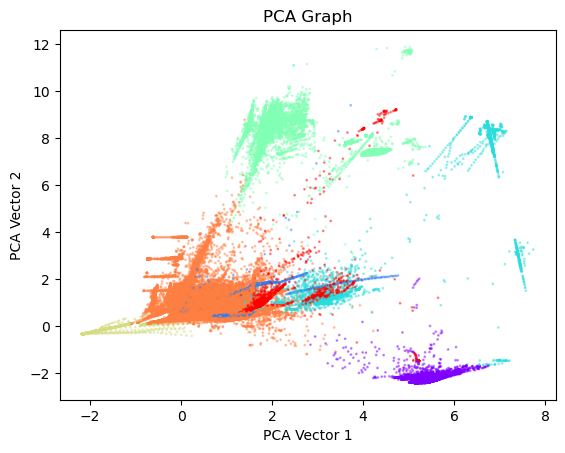

In [7]:
# Create the dummy variables for PCA
dummy_df = pd.get_dummies(X_scaled, 
                          columns = ['protocol_type', 'service', 'flag'],
                          prefix = ['protocol_type', 'service', 'flag'],
                          prefix_sep = '/')

# Create the PCA object since the data has already been scaled
pca = PCA(n_components = 2)
# fit the data
pca_vectors = pca.fit_transform(dummy_df)

# Import the cluster labels for K=7
clus_labels = pd.read_csv(r'./data/processed/data+k=7.csv')['k=7']

# Graph the two vectors to see if there are clusters
plt.style.use('default');
# Create a scatter plot representing the PCA transformation
plt.scatter(pca_vectors[:,0], pca_vectors[:,1], 
            c = clus_labels, cmap = 'rainbow',
            s = 1, alpha = 0.4);
# Label the axes in the graph
plt.xlabel('PCA Vector 1');
plt.ylabel('PCA Vector 2');
# Give the plot a title
plt.title('PCA Graph');


This graph provides solid visual evidence that clusters exist. Some of the clusters that are shown in the PCA graph may not look correct, but some of the variables in this dataset are not PCA friendly. Variables with little variance have little influence on PCA vectors but those same variables can have a significant effect on a point in KPrototype clustering.

It is also important to note that there were 41 different features in the dataset. If I had selected 3 PCA vectors instead of 2 PCA vectors, it's possible the clusters would have been clearer. 

With a preponderance of evidence for the existance of a clustered structure, we can save the cluster labels and start analyzing the the clusters themselves.

## Cluster Analysis

Now that we have cluster labels, we can see how those cluster labels interact with different types of intrusions. First, I plotted a histogram of different types of intrusions and colored each observation with the its cluster. Hopefully the different intrusion types fully belong to a single clusters, although if the graph isn't that clean, there are still other ways to analyze the clusters.

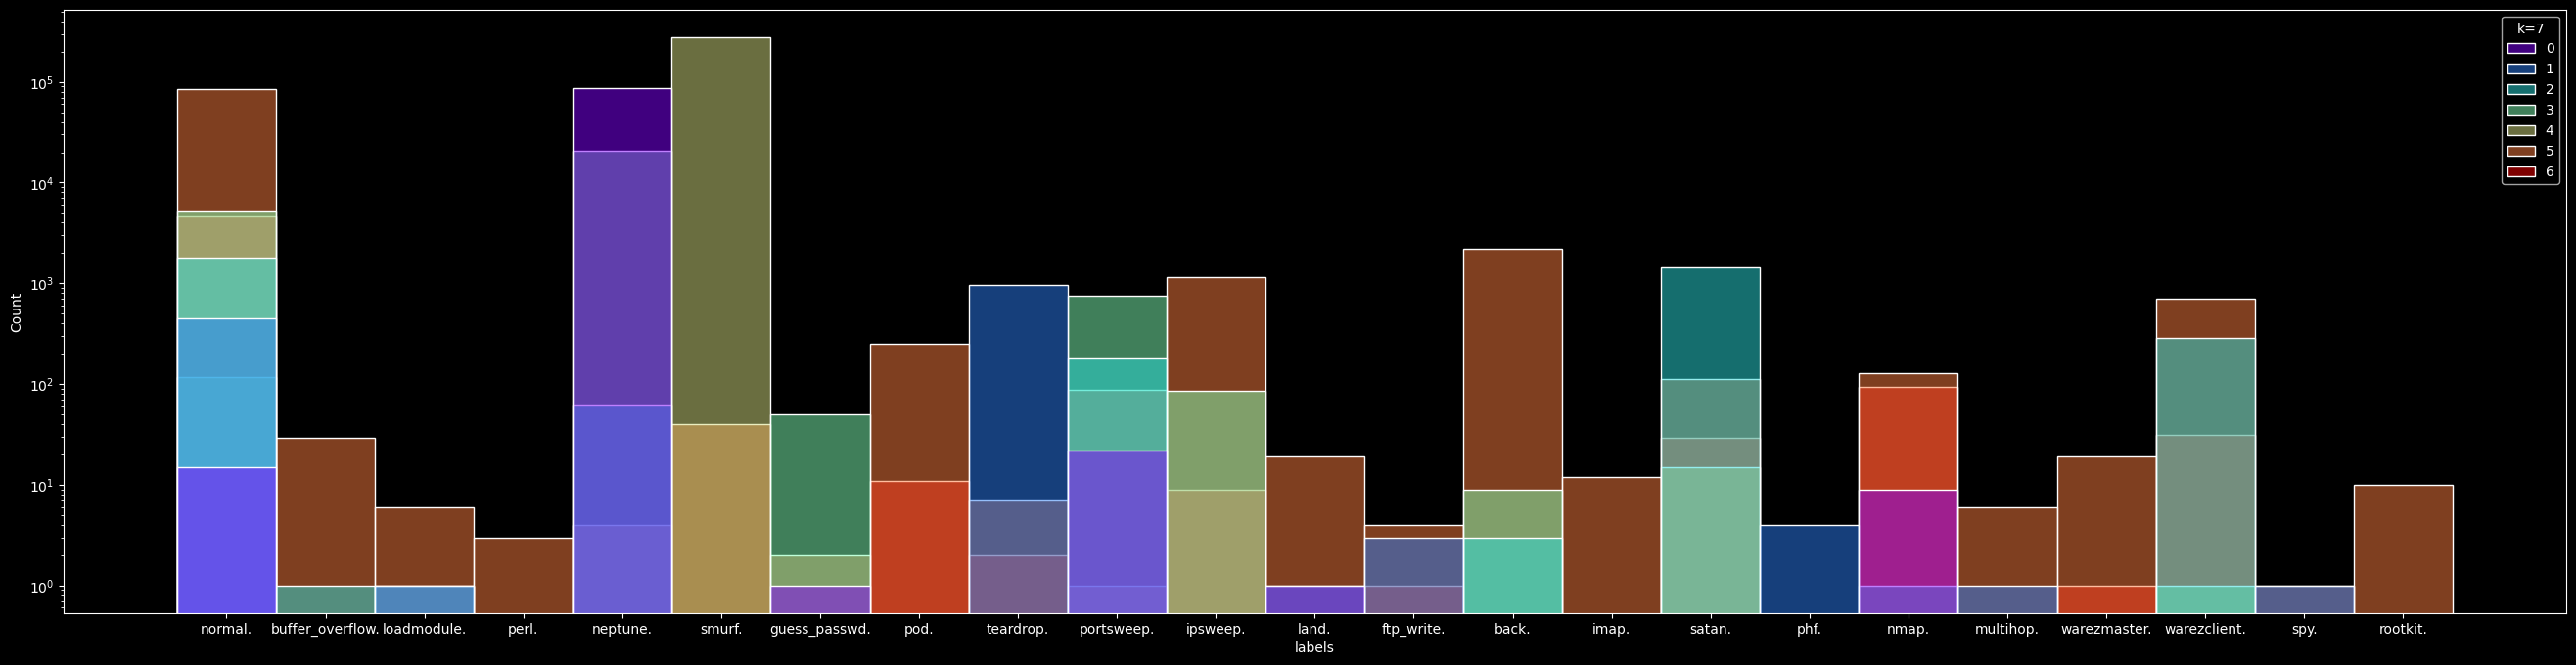

smurf.              0.568378
neptune.            0.216997
normal.             0.196909
back.               0.004459
satan.              0.003216
ipsweep.            0.002524
portsweep.          0.002105
warezclient.        0.002065
teardrop.           0.001982
pod.                0.000534
nmap.               0.000468
guess_passwd.       0.000107
buffer_overflow.    0.000061
land.               0.000043
warezmaster.        0.000040
imap.               0.000024
rootkit.            0.000020
loadmodule.         0.000018
ftp_write.          0.000016
multihop.           0.000014
phf.                0.000008
perl.               0.000006
spy.                0.000004
Name: labels, dtype: float64


In [43]:
# import dataset with K=7 clusters
dataK7 = pd.read_csv(r'./data/processed/data+k=7.csv')

#Switch back to dark mode for my eyes
plt.style.use('dark_background')

# Change figure size so that the x tick marks are readable
plt.figure(figsize = (33,8))

# Create a histogram of the types of network intrusions including non-intrusions
sns.histplot(data = data, x = 'labels', hue = 'k=7', palette = 'rainbow')

# Set the scale to log so that we can have a much better visualization of the attacks
plt.yscale('log')

plt.show()

# Give context to how much each intrusion occurs
print(data['labels'].value_counts(normalize = True))

Unfortunately, each intrusion has many different clusters inside of it but there is still a lot of analysis to be done. One possibility is to examine the frequency of a cluster's normal observations and the severity of the attacks it contains. 

Before any of that, I will create a correlation matrix to better visualize clear relationships between the clusters and the attack types. If there is, it will give us interesting options to pursue.

100%|██████████| 7/7 [00:01<00:00,  5.79it/s]


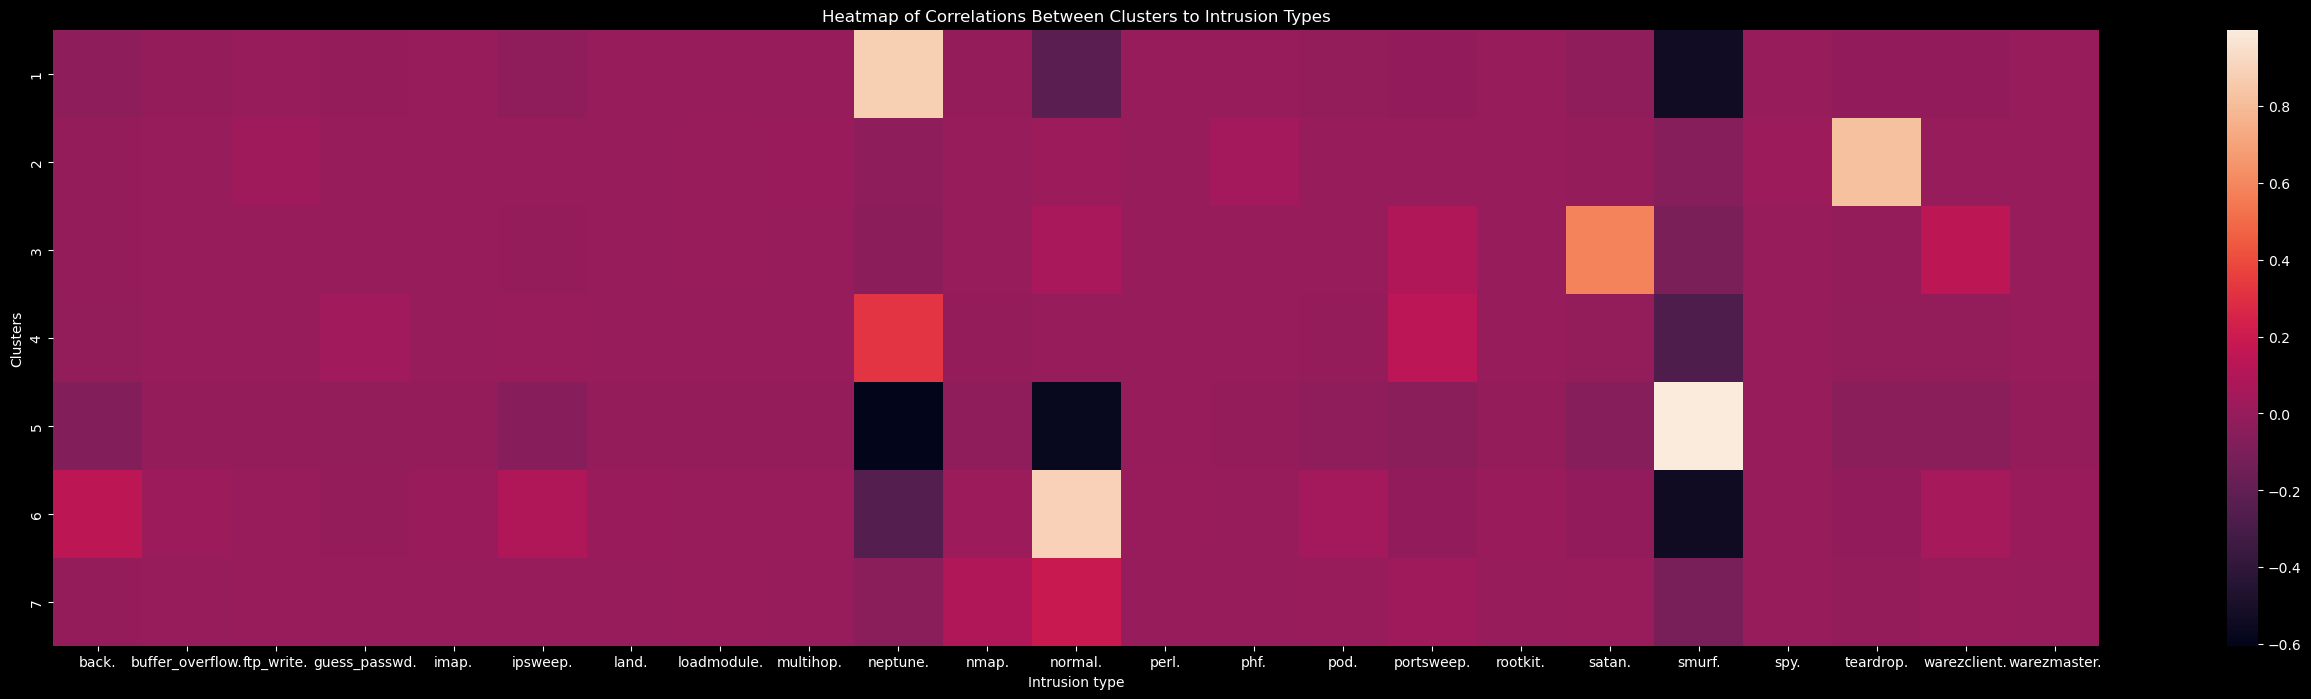

In [19]:
# import the data with K=7
dataK7 = pd.read_csv(r'./data/processed/data+k=7.csv')[['labels', 'k=7']]

#Create a dummy matrix for the types of intrusions and labels
lab_clus_dummy = pd.get_dummies(dataK7, columns = ['labels', 'k=7'], 
                                # No prefix to make the graph look better
                                prefix = ['', ''], 
                                # No sep to make the graph look better
                                prefix_sep = '')

corr_matrix = np.zeros((23,7))

for k in tqdm(range(23, len(lab_clus_dummy.columns))):
    for label in range(23):
        corr_matrix[label, k-23] = lab_clus_dummy.iloc[:,k].T.corr(other = lab_clus_dummy.iloc[:,label])



corr_df = pd.DataFrame(corr_matrix, 
                       columns = range(1,8),
                       index = lab_clus_dummy.columns[:23])



#Back to darkmode for the eyes
plt.style.use('dark_background')
# Change the figure size so that all the intrusions types are legible
plt.figure(figsize = (33,8))
# Create a heatmap of correlation matrix to see each clusters highest intrusion correlations
sns.heatmap(corr_df.T);
# Label the axes
plt.xlabel('Intrusion type');
plt.ylabel('Clusters');
# Give a title
plt.title('Heatmap of Correlations Between Clusters to Intrusion Types');

From this graph it is clear that some of the clusters have strong correlations to some of the label types. There is a lot to still unpack but this dataset is starting to look promising.